In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Cargar los datasets de los equipos
file_paths = {
    "Athletic Bilbao": "../datasets/datasets_equipos/ath_bilbao.csv",
    "Barcelona": "../datasets/datasets_equipos/barcelona.csv",
    "Real Madrid": "../datasets/datasets_equipos/real_madrid.csv",
    "Valencia": "../datasets/datasets_equipos/valencia.csv"
}

#### Resumen de los análisis generados

1. **Distribución de goles anotados y recibidos**  
   - Histogramas para visualizar la frecuencia de goles marcados (`goals_team`) y recibidos (`goals_rival`).

2. **Boxplot de la diferencia de goles**  
   - Representación de la distribución de `goal_difference` para detectar tendencias ofensivas y defensivas.

3. **Evolución del porcentaje de victorias contra rivales**  
   - Gráfico de líneas mostrando la evolución de `pct_wins_vs_rival` a lo largo de las temporadas.

4. **Mapa de calor de la diferencia de goles contra rivales**  
   - Visualización de `goal_difference_vs_rival` para identificar qué rivales son más complicados.

5. **Comparación del porcentaje de victorias en casa y fuera**  
   - Boxplot de `pct_wins` diferenciando partidos en casa (`home_adv = 1`) y fuera (`home_adv = 0`).

6. **Relación entre goles anotados y recibidos en casa y fuera**  
   - Scatter plots individuales para cada equipo comparando `avg_goals_scored` y `avg_goals_received`.

7. **Relación entre cuotas y resultados**  
   - Scatter plot de `AvgWin` y `AvgLoss` coloreado según el resultado (`result`).

8. **Frecuencia de victorias según las cuotas**  
   - Gráfico de barras mostrando la cantidad de victorias en función de `AvgWin`.

9. **Comparación de las cuotas en partidos ganados y perdidos**  
   - Boxplot comparando `AvgWin` en partidos ganados (`result = 1`) y perdidos (`result = -1`).

10. **Relación entre las cuotas y el resultado del partido**  
    - Scatter plot analizando cómo `AvgWin` se relaciona con `result`, considerando solo cuotas entre 0 y 5.
    - Cálculo de la correlación entre `AvgWin` y `result` para determinar si cuotas más altas están asociadas con más derrotas.
    - Ayuda a entender si las cuotas reflejan correctamente la probabilidad de victoria o si hay sesgos.

11. **Evolución del rendimiento del equipo a lo largo del tiempo**  
    - Gráfico de líneas con dos ejes: `goal_difference` (izquierda) y `pct_wins` (derecha, de 0 a 1).

#### Distribución de goles anotados y recibidos

- Se muestra la distribución de los goles anotados (`goals_team`) y recibidos (`goals_rival`) por cada equipo.
- Se utilizan histogramas para visualizar la frecuencia de los distintos valores de goles en los partidos.
- Permite analizar qué tan frecuente es que un equipo marque o reciba cierta cantidad de goles.


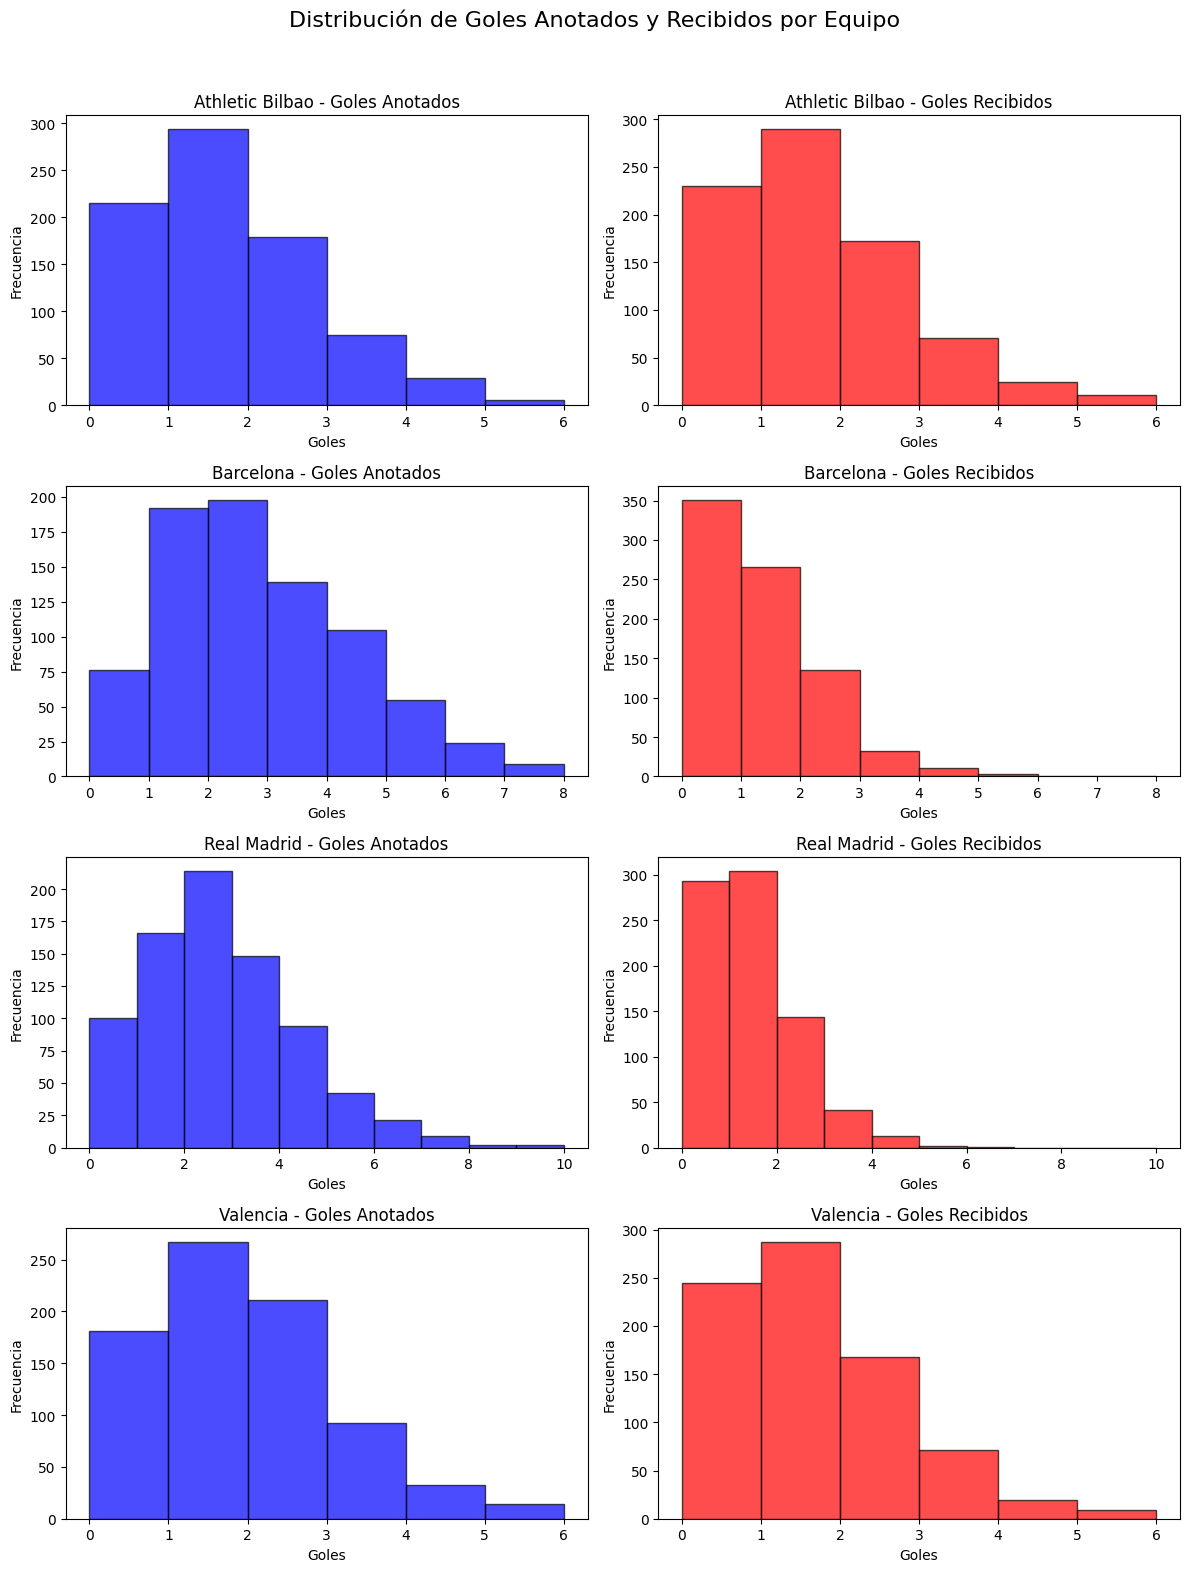

In [3]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
fig.suptitle("Distribución de Goles Anotados y Recibidos por Equipo", fontsize=16)

for i, (team, path) in enumerate(file_paths.items()):
    df = pd.read_csv(path)

    # Histograma de goles anotados
    axes[i, 0].hist(df['goals_team'], bins=range(0, max(df['goals_team'].max(), df['goals_rival'].max()) + 1), alpha=0.7, color='blue', edgecolor='black')
    axes[i, 0].set_title(f"{team} - Goles Anotados")
    axes[i, 0].set_xlabel("Goles")
    axes[i, 0].set_ylabel("Frecuencia")

    # Histograma de goles recibidos
    axes[i, 1].hist(df['goals_rival'], bins=range(0, max(df['goals_team'].max(), df['goals_rival'].max()) + 1), alpha=0.7, color='red', edgecolor='black')
    axes[i, 1].set_title(f"{team} - Goles Recibidos")
    axes[i, 1].set_xlabel("Goles")
    axes[i, 1].set_ylabel("Frecuencia")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Boxplot de la diferencia de goles

- Se representa la distribución de la diferencia de goles (`goal_difference`) para cada equipo.
- Permite identificar la tendencia del equipo en términos ofensivos y defensivos.
- Los valores atípicos pueden mostrar partidos con marcadores inusuales.

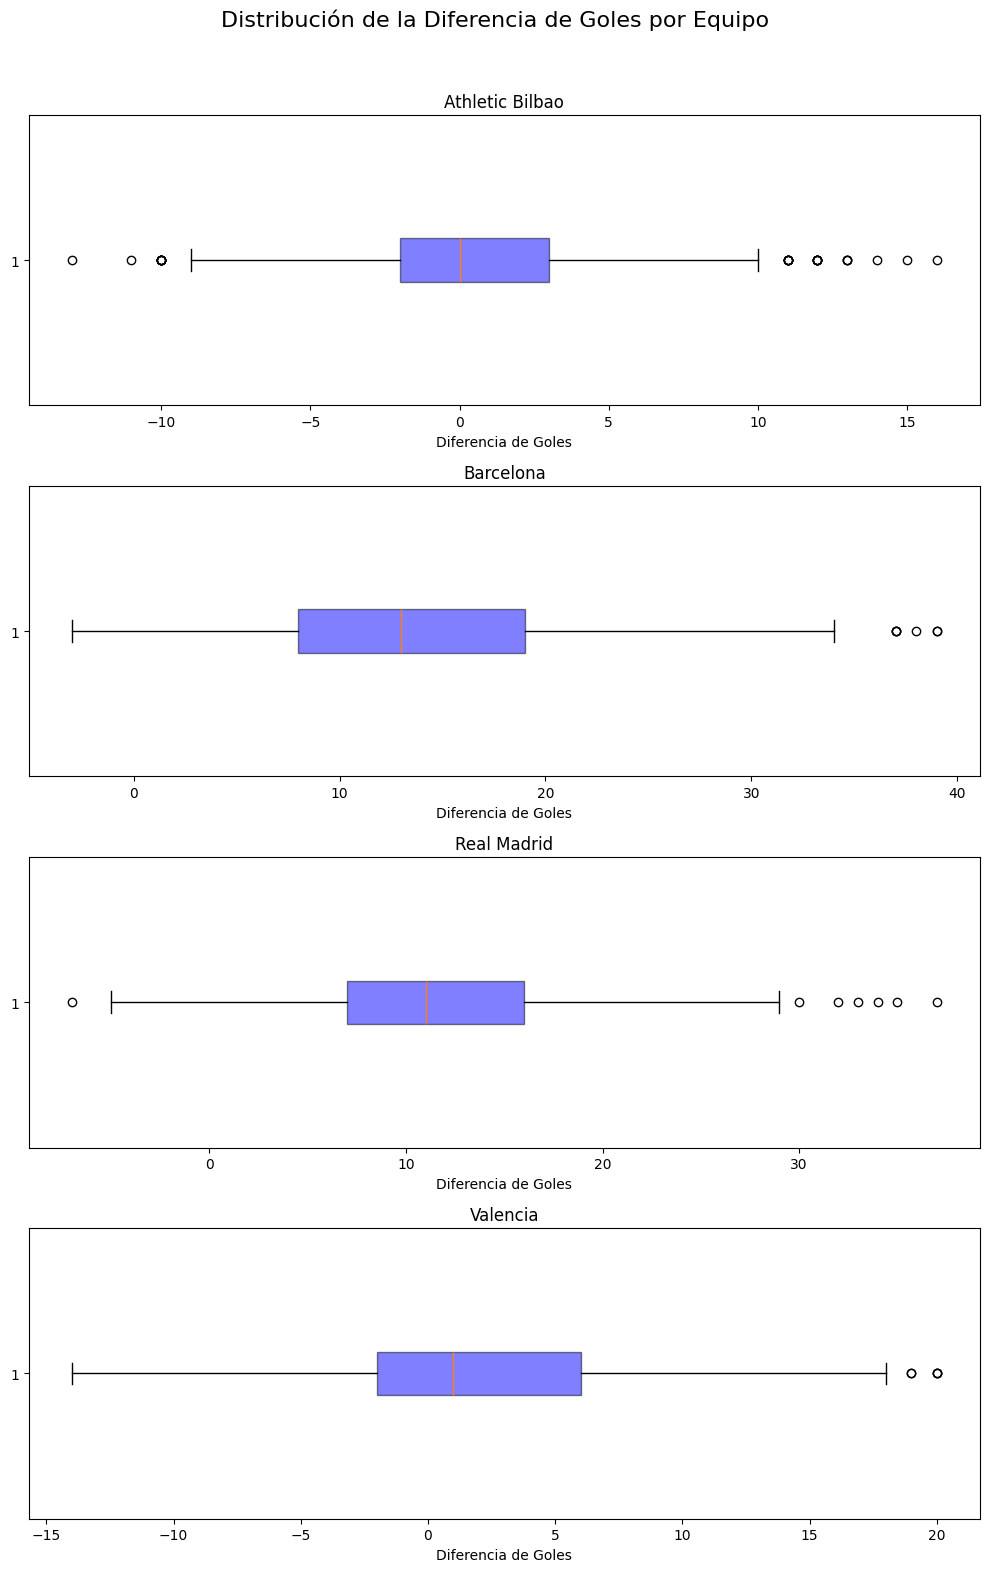

In [4]:

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 16))
fig.suptitle("Distribución de la Diferencia de Goles por Equipo", fontsize=16)

for i, (team, path) in enumerate(file_paths.items()):
    df = pd.read_csv(path)

    # Boxplot de la diferencia de goles
    axes[i].boxplot(df['goal_difference'], vert=False, patch_artist=True, boxprops=dict(facecolor="blue", alpha=0.5))
    axes[i].set_title(f"{team}")
    axes[i].set_xlabel("Diferencia de Goles")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Comparación del porcentaje de victorias contra rivales a lo largo de las temporadas

- Se muestra la evolución del porcentaje de victorias contra rivales (`pct_wins_vs_rival`) para los cuatro equipos en una misma gráfica.
- Permite comparar cómo ha evolucionado el rendimiento de cada equipo en sus enfrentamientos directos con rivales.


C:\Users\anaig\AppData\Local\Temp\ipykernel_24508\2522013368.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


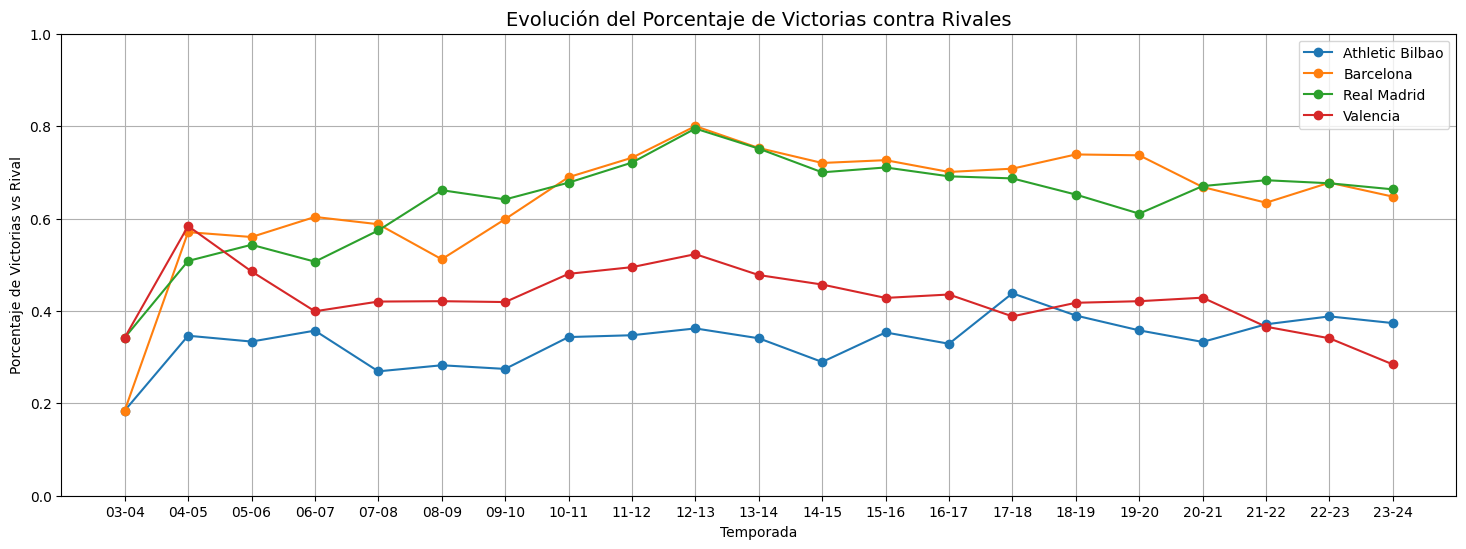

In [6]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.set_title("Evolución del Porcentaje de Victorias contra Rivales", fontsize=14)

for team, path in file_paths.items():
    df = pd.read_csv(path)

    # Agrupar por temporada y calcular el promedio de victorias contra rivales
    df_grouped = df.groupby("season")["pct_wins_vs_rival"].mean().reset_index()

    ax.plot(df_grouped["season"], df_grouped["pct_wins_vs_rival"], marker='o', linestyle='-', label=team)

ax.set_xlabel("Temporada")
ax.set_ylabel("Porcentaje de Victorias vs Rival")
ax.set_ylim(0, 1)  # Normalizar el eje Y entre 0 y 1
ax.legend()
ax.grid(True)

# Modificar las etiquetas del eje X
new_labels = [f"{str(year)[-2:]}-{str(year+1)[-2:]}" for year in range(2003, 2003 + len(ax.get_xticks()))]
ax.set_xticklabels(new_labels)

plt.show()

#### Mapa de calor de la diferencia de goles contra rivales

- Se representa la diferencia de goles promedio (`goal_difference_vs_rival`) contra cada rival.
- Permite identificar a qué rivales les cuesta más ganar y contra cuáles tienen mejor desempeño.
- Los valores más altos indican mejores resultados contra ese rival, mientras que los valores negativos muestran dificultades.


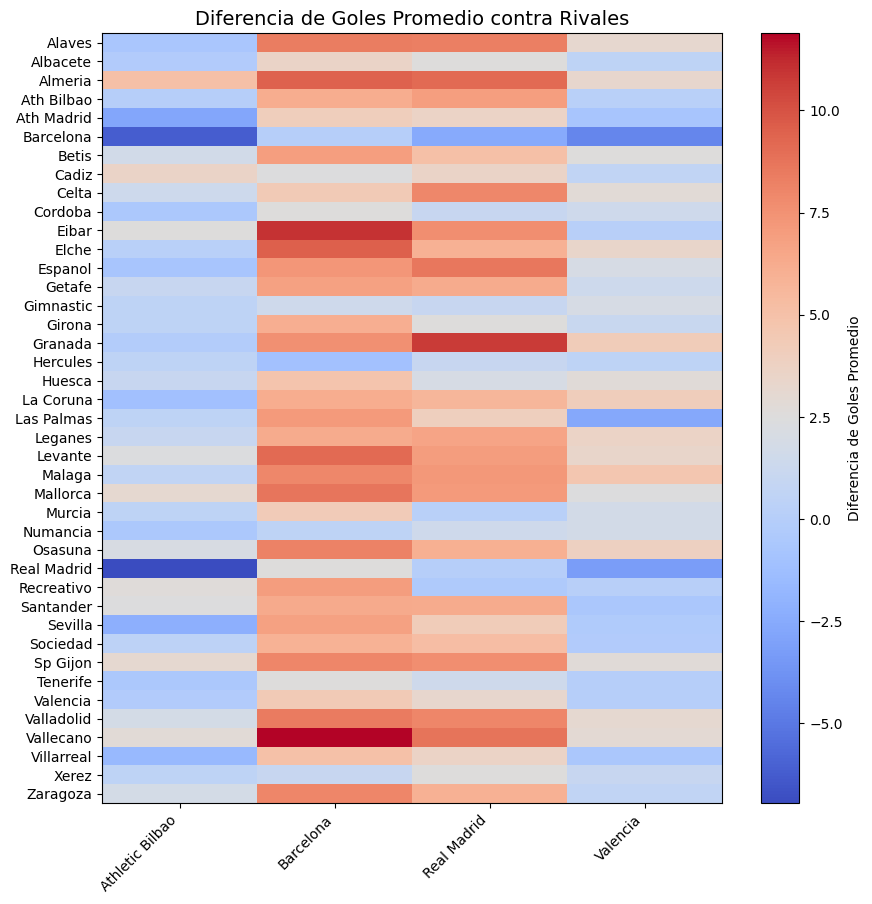

In [7]:
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Diferencia de Goles Promedio contra Rivales", fontsize=14)

# Crear un diccionario para almacenar la media de goal_difference_vs_rival por equipo y rival
heatmap_data = {}

for team, path in file_paths.items():
    df = pd.read_csv(path)
    
    # Agrupar por rival y calcular la media de goal_difference_vs_rival
    df_grouped = df.groupby("rival_team")["goal_difference_vs_rival"].mean()
    
    # Guardar en el diccionario
    heatmap_data[team] = df_grouped

# Convertir el diccionario en un DataFrame
df_heatmap = pd.DataFrame(heatmap_data).fillna(0)

# Graficar como imagen con mapa de calor
cax = ax.imshow(df_heatmap, cmap="coolwarm", aspect="auto", interpolation="nearest")

# Etiquetas en los ejes
ax.set_xticks(range(len(df_heatmap.columns)))
ax.set_xticklabels(df_heatmap.columns, rotation=45, ha="right")

ax.set_yticks(range(len(df_heatmap.index)))
ax.set_yticklabels(df_heatmap.index)

# Barra de colores
fig.colorbar(cax, ax=ax, label="Diferencia de Goles Promedio")

plt.show()

#### Comparación del porcentaje de victorias en casa y fuera

- Se utiliza un boxplot para comparar el porcentaje de victorias (`pct_wins`) cuando el equipo juega en casa (`home_adv = 1`) y cuando juega fuera (`home_adv = 0`).
- Permite analizar si los equipos tienen un rendimiento significativamente mejor como local o si mantienen un desempeño similar fuera de casa.
- Diferencias marcadas pueden indicar dependencia del factor localía.

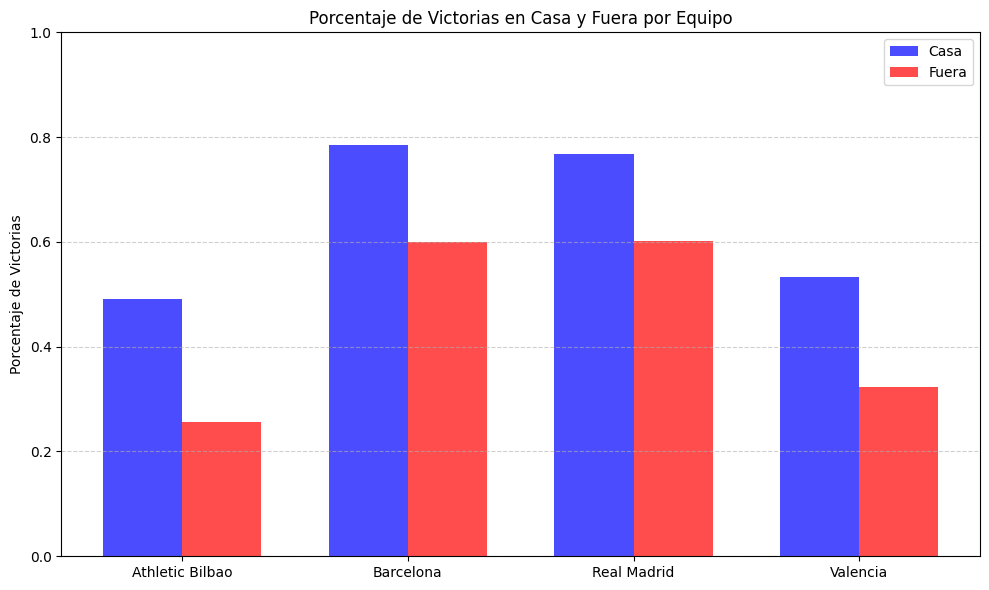

In [23]:
# Preparar los datos para el gráfico
teams = []
home_win_rates = []
away_win_rates = []

for team, path in file_paths.items():
    df = pd.read_csv(path)

    total_home = df[df["home_adv"] == 1]
    total_away = df[df["home_adv"] == 0]

    # Calcular porcentaje de victorias (result == 1)
    pct_home = (total_home["result"] == 1).mean()
    pct_away = (total_away["result"] == 1).mean()

    teams.append(team)
    home_win_rates.append(pct_home)
    away_win_rates.append(pct_away)

# Posiciones para las barras
x = np.arange(len(teams))
width = 0.35

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, home_win_rates, width, label="Casa", color="blue", alpha=0.7)
ax.bar(x + width/2, away_win_rates, width, label="Fuera", color="red", alpha=0.7)

ax.set_xticks(x)
ax.set_xticklabels(teams)
ax.set_ylabel("Porcentaje de Victorias")
ax.set_title("Porcentaje de Victorias en Casa y Fuera por Equipo")
ax.set_ylim(0, 1)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


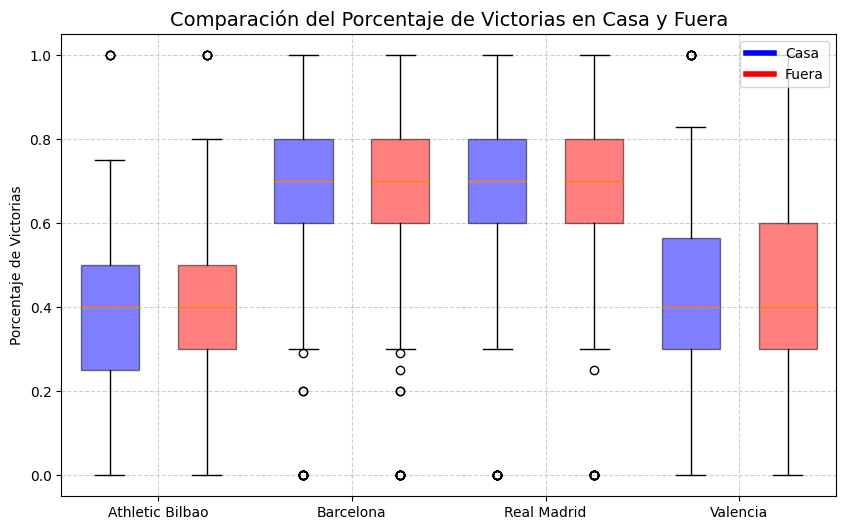

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Comparación del Porcentaje de Victorias en Casa y Fuera", fontsize=14)

data_home = []
data_away = []
positions_home = []
positions_away = []
labels = []

for i, (team, path) in enumerate(file_paths.items()):
    df = pd.read_csv(path)
    
    # Separar victorias en casa y fuera
    home_wins = df[df["home_adv"] == 1]["pct_wins"]
    away_wins = df[df["home_adv"] == 0]["pct_wins"]
    
    data_home.append(home_wins)
    data_away.append(away_wins)
    positions_home.append(i * 2)
    positions_away.append(i * 2 + 1)
    labels.append(team)

# Crear boxplots para victorias en casa y fuera con colores distintos
box_home = ax.boxplot(data_home, positions=positions_home, widths=0.6, patch_artist=True, boxprops=dict(facecolor="blue", alpha=0.5))
box_away = ax.boxplot(data_away, positions=positions_away, widths=0.6, patch_artist=True, boxprops=dict(facecolor="red", alpha=0.5))

ax.set_xticks(np.arange(len(labels)) * 2 + 0.5)
ax.set_xticklabels(labels)
ax.set_ylabel("Porcentaje de Victorias")

# Agregar leyenda manualmente con colores correctos
legend_elements = [
    plt.Line2D([0], [0], color="blue", lw=4, label="Casa"),
    plt.Line2D([0], [0], color="red", lw=4, label="Fuera")
]
ax.legend(handles=legend_elements, loc="upper right")

ax.grid(True, linestyle="--", alpha=0.6)

plt.show()


#### Relación entre goles anotados y recibidos en casa y fuera

- Se utiliza un gráfico de dispersión para comparar `avg_goals_scored` y `avg_goals_received` según si el equipo juega en casa (`home_adv = 1`) o fuera (`home_adv = 0`).
- Cada equipo tiene su propio gráfico para evitar sobreposición y facilitar la interpretación.
- Permite analizar si los equipos tienden a marcar más goles en casa y recibir más fuera de casa.

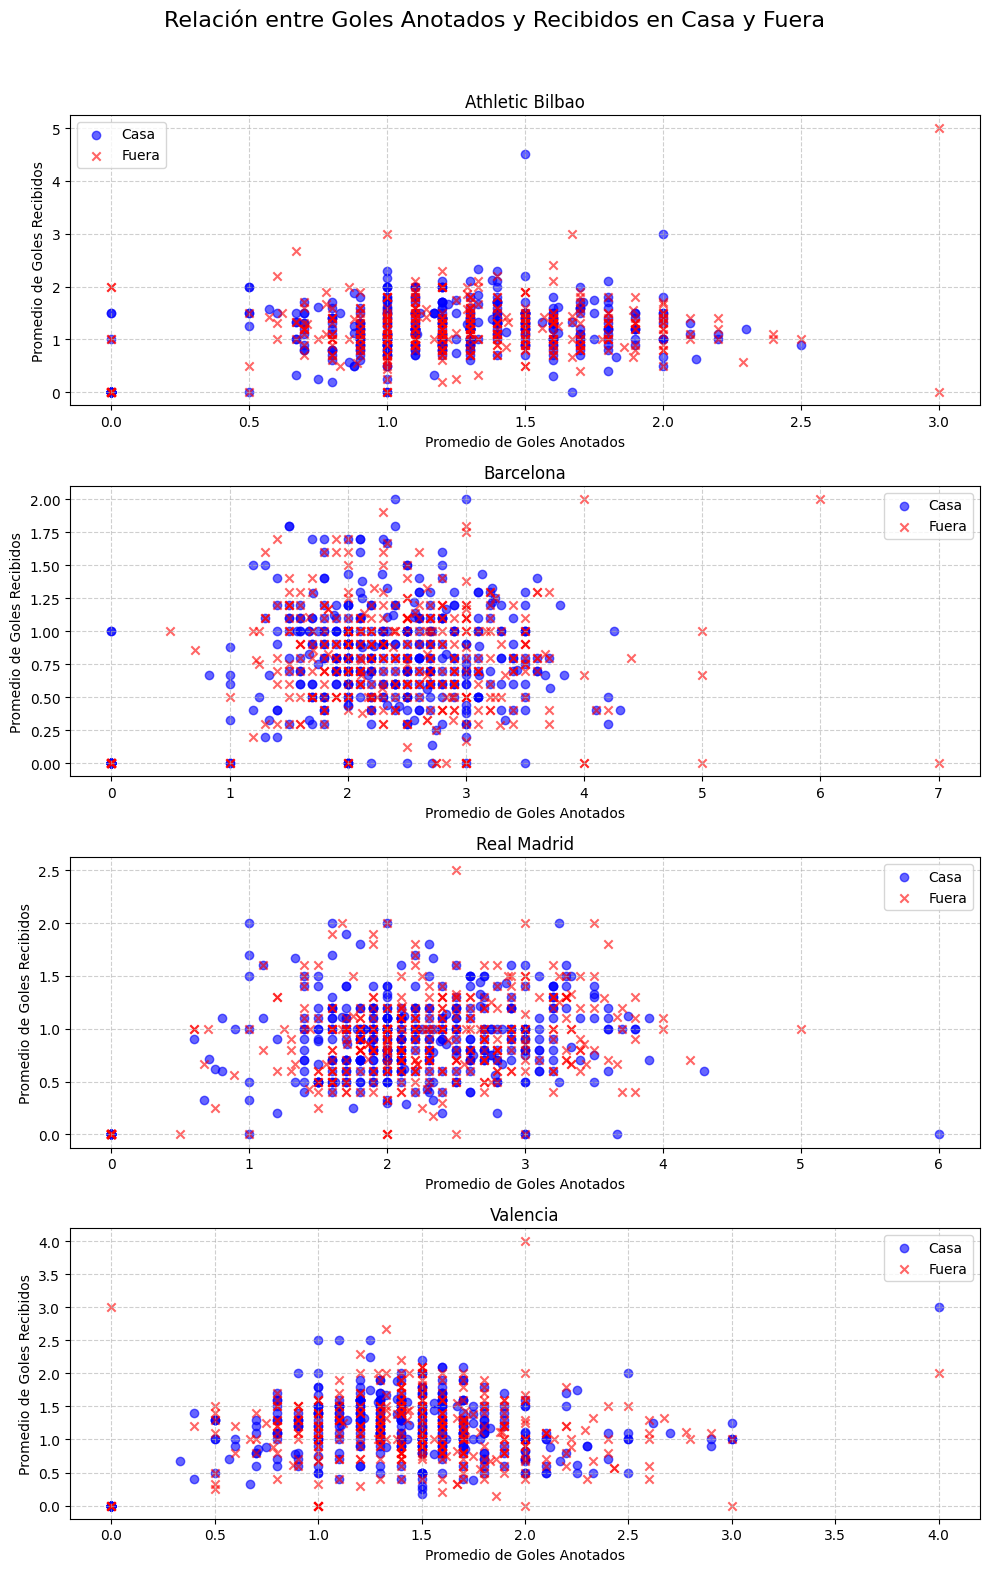

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 16))
fig.suptitle("Relación entre Goles Anotados y Recibidos en Casa y Fuera", fontsize=16)

for i, (team, path) in enumerate(file_paths.items()):
    df = pd.read_csv(path)

    # Filtrar datos en casa y fuera
    home_games = df[df["home_adv"] == 1]
    away_games = df[df["home_adv"] == 0]

    # Graficar scatter plot para cada equipo
    axes[i].scatter(home_games["avg_goals_scored"], home_games["avg_goals_received"], color="blue", alpha=0.6, label="Casa", marker="o")
    axes[i].scatter(away_games["avg_goals_scored"], away_games["avg_goals_received"], color="red", alpha=0.6, label="Fuera", marker="x")

    axes[i].set_title(team)
    axes[i].set_xlabel("Promedio de Goles Anotados")
    axes[i].set_ylabel("Promedio de Goles Recibidos")
    axes[i].legend()
    axes[i].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Relación entre cuotas y resultados

- Se utiliza un gráfico de dispersión para analizar la relación entre las cuotas (`AvgWin`, `AvgLoss`) y el resultado del partido (`result`).
- `result` toma valores de 1 (Victoria), 0 (Empate) y -1 (Derrota), y se asignan colores distintos para cada caso.
- Permite evaluar si las cuotas reflejan correctamente la probabilidad de ganar o perder.
- Ayuda a identificar posibles sesgos en las cuotas de las casas de apuestas.


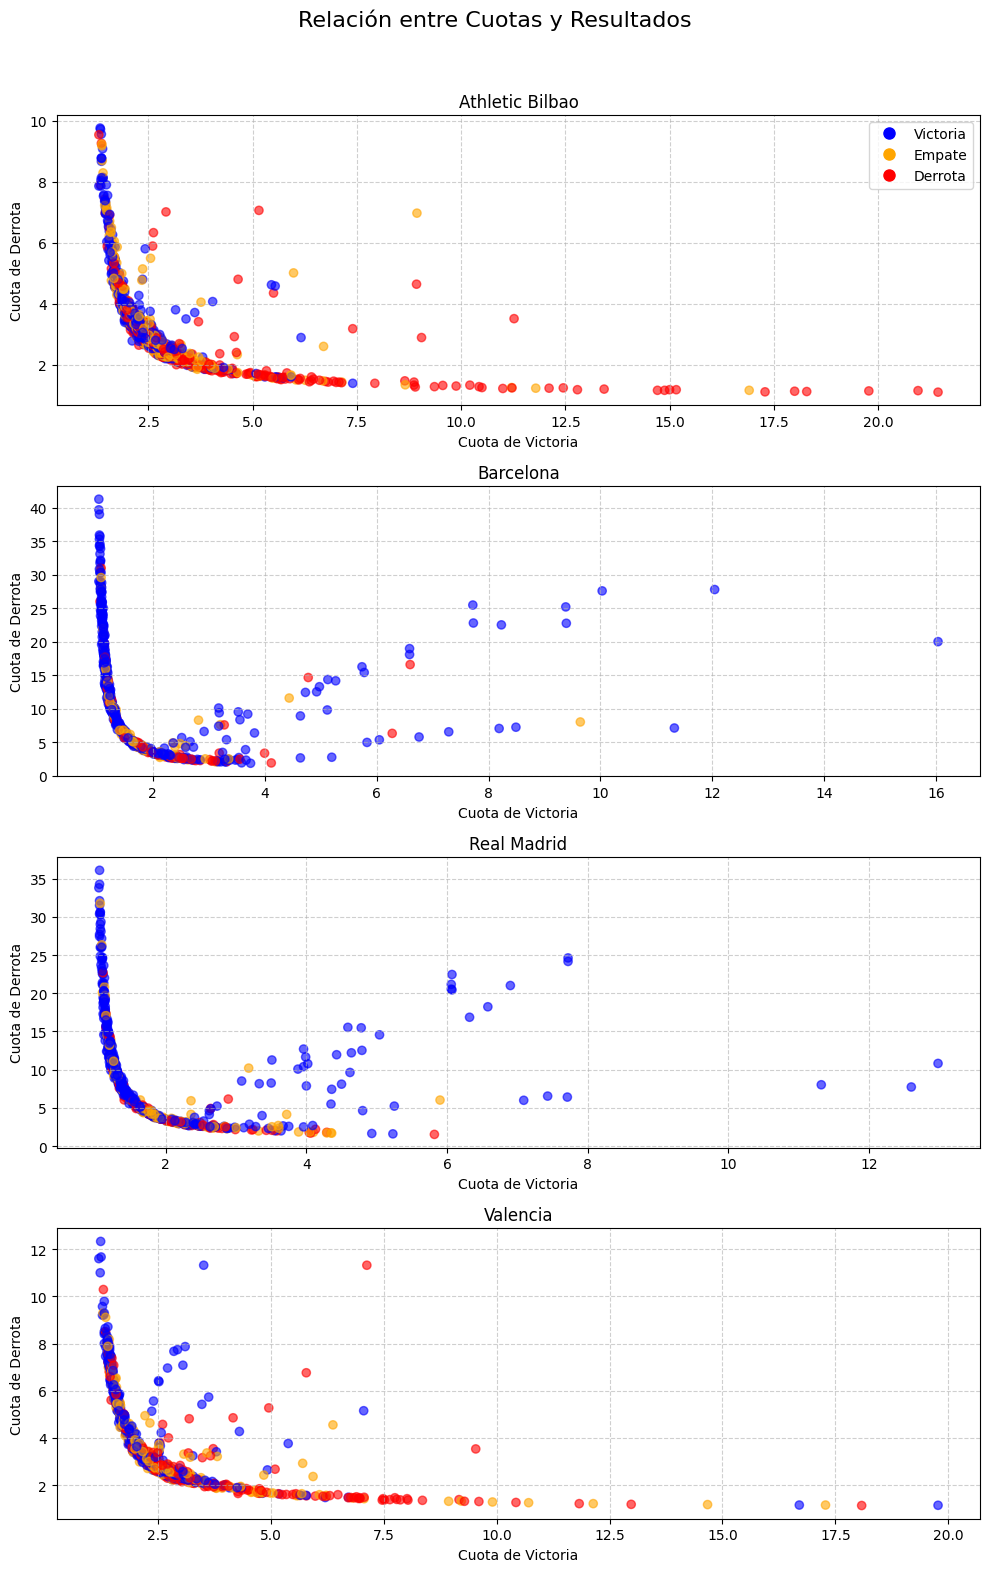

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 16))
fig.suptitle("Relación entre Cuotas y Resultados", fontsize=16)

# Mapeo de colores para los resultados
color_map = {1: "blue", 0: "orange", -1: "red"}
legend_labels = {1: "Victoria", 0: "Empate", -1: "Derrota"}

for i, (team, path) in enumerate(file_paths.items()):
    df = pd.read_csv(path)

    # Asignar colores según el resultado del partido
    colors = [color_map[result] for result in df["result"]]

    # Graficar scatter plot de las cuotas vs resultado
    scatter = axes[i].scatter(df["AvgWin"], df["AvgLoss"], c=colors, alpha=0.6)
    
    axes[i].set_title(team)
    axes[i].set_xlabel("Cuota de Victoria")
    axes[i].set_ylabel("Cuota de Derrota")
    axes[i].grid(True, linestyle="--", alpha=0.6)

# Agregar leyenda manualmente
handles = [plt.Line2D([0], [0], marker='o', color=color_map[result], markersize=8, linestyle='None', label=label) 
           for result, label in legend_labels.items()]
axes[0].legend(handles=handles, loc="upper right")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Frecuencia de victorias según las cuotas

- Se utiliza un gráfico de barras para analizar la frecuencia de victorias en función de la cuota de victoria (`AvgWin`).
- Permite evaluar si las cuotas altas o bajas están asociadas con más victorias.
- Puede ayudar a identificar oportunidades en las apuestas si hay muchas victorias con cuotas altas.

C:\Users\anaig\AppData\Local\Temp\ipykernel_24508\403791970.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wins["binned_AvgWin"] = pd.cut(df_wins["AvgWin"], bins)
C:\Users\anaig\AppData\Local\Temp\ipykernel_24508\403791970.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wins["binned_AvgWin"] = pd.cut(df_wins["AvgWin"], bins)
C:\Users\anaig\AppData\Local\Temp\ipykernel_24508\403791970.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

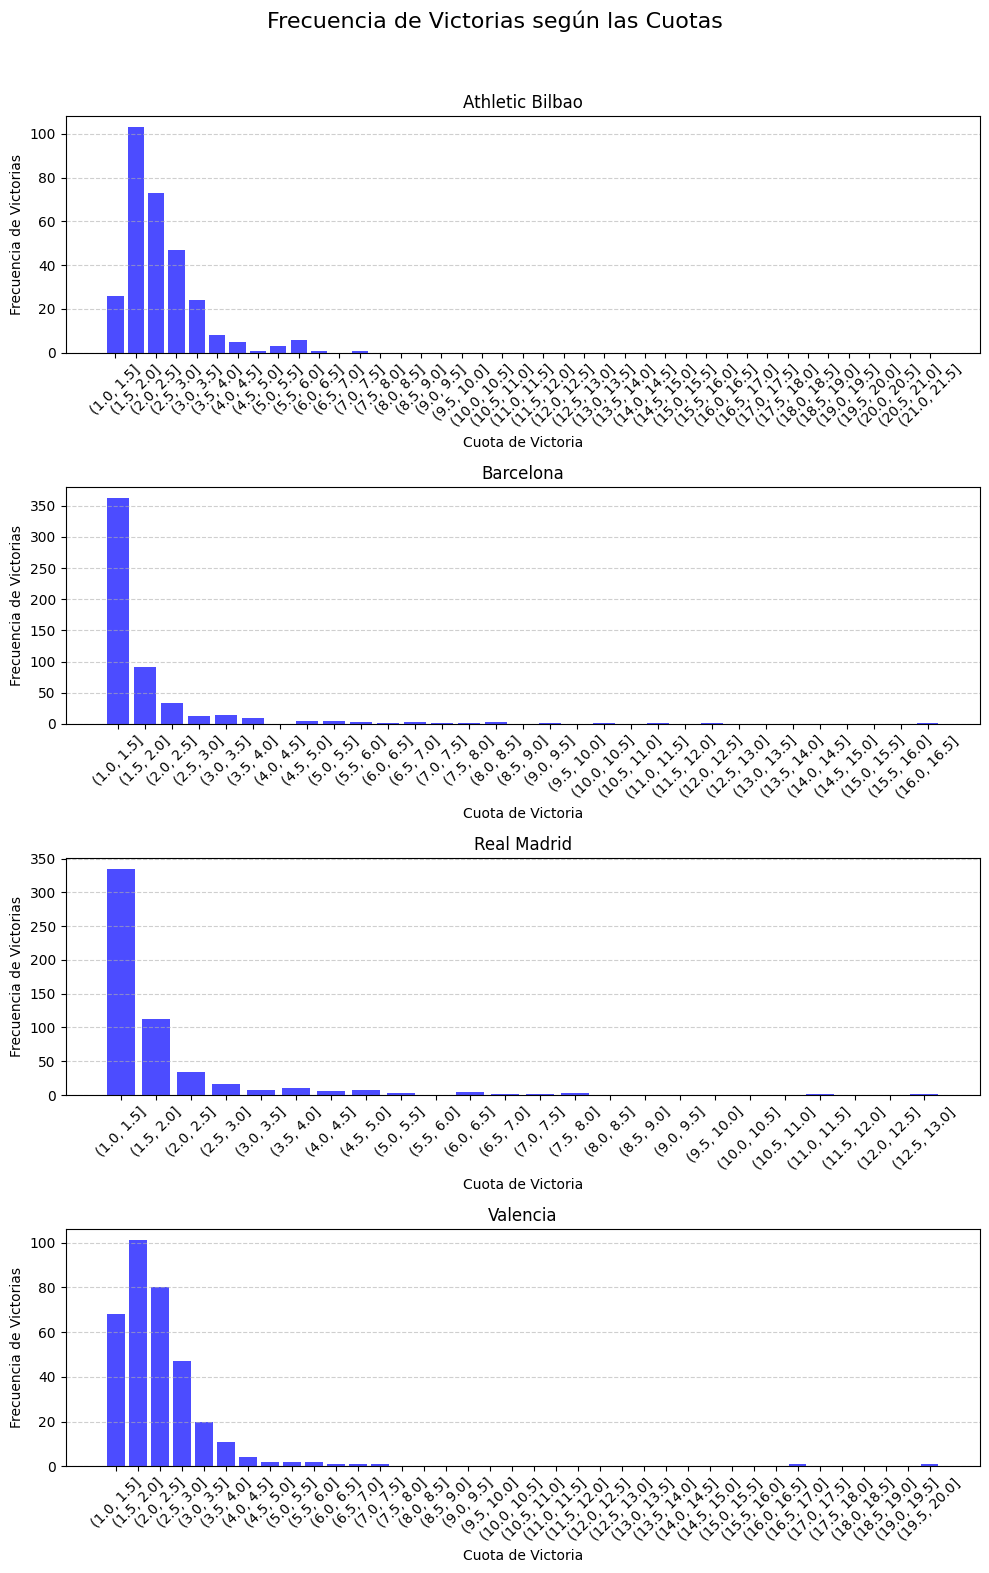

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 16))
fig.suptitle("Frecuencia de Victorias según las Cuotas", fontsize=16)

for i, (team, path) in enumerate(file_paths.items()):
    df = pd.read_csv(path)

    # Filtrar solo los partidos ganados
    df_wins = df[df["result"] == 1]

    # Agrupar por intervalos de cuotas
    bins = np.arange(1, df["AvgWin"].max() + 0.5, 0.5)  # Intervalos de 0.5 en las cuotas
    df_wins["binned_AvgWin"] = pd.cut(df_wins["AvgWin"], bins)

    # Contar frecuencia de victorias por cada intervalo de cuotas
    win_counts = df_wins["binned_AvgWin"].value_counts().sort_index()

    # Graficar
    axes[i].bar(win_counts.index.astype(str), win_counts.values, color="blue", alpha=0.7)
    axes[i].set_title(team)
    axes[i].set_xlabel("Cuota de Victoria")
    axes[i].set_ylabel("Frecuencia de Victorias")
    axes[i].tick_params(axis="x", rotation=45)
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Comparación de las cuotas en partidos ganados y perdidos

- Se utiliza un boxplot para comparar las cuotas de victoria (`AvgWin`) en partidos ganados y perdidos.
- Permite analizar si las casas de apuestas subestiman o sobrestiman ciertos equipos.
- Cuotas más altas en partidos ganados podrían indicar valor en las apuestas.

C:\Users\anaig\AppData\Local\Temp\ipykernel_24508\783110423.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([win_odds, loss_odds], labels=["Ganados", "Perdidos"], patch_artist=True,
C:\Users\anaig\AppData\Local\Temp\ipykernel_24508\783110423.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([win_odds, loss_odds], labels=["Ganados", "Perdidos"], patch_artist=True,
C:\Users\anaig\AppData\Local\Temp\ipykernel_24508\783110423.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([win_odds, loss_odds], labels=["Ganados", "Perdidos"], patch_artist=True,
C:\Users\anaig\A

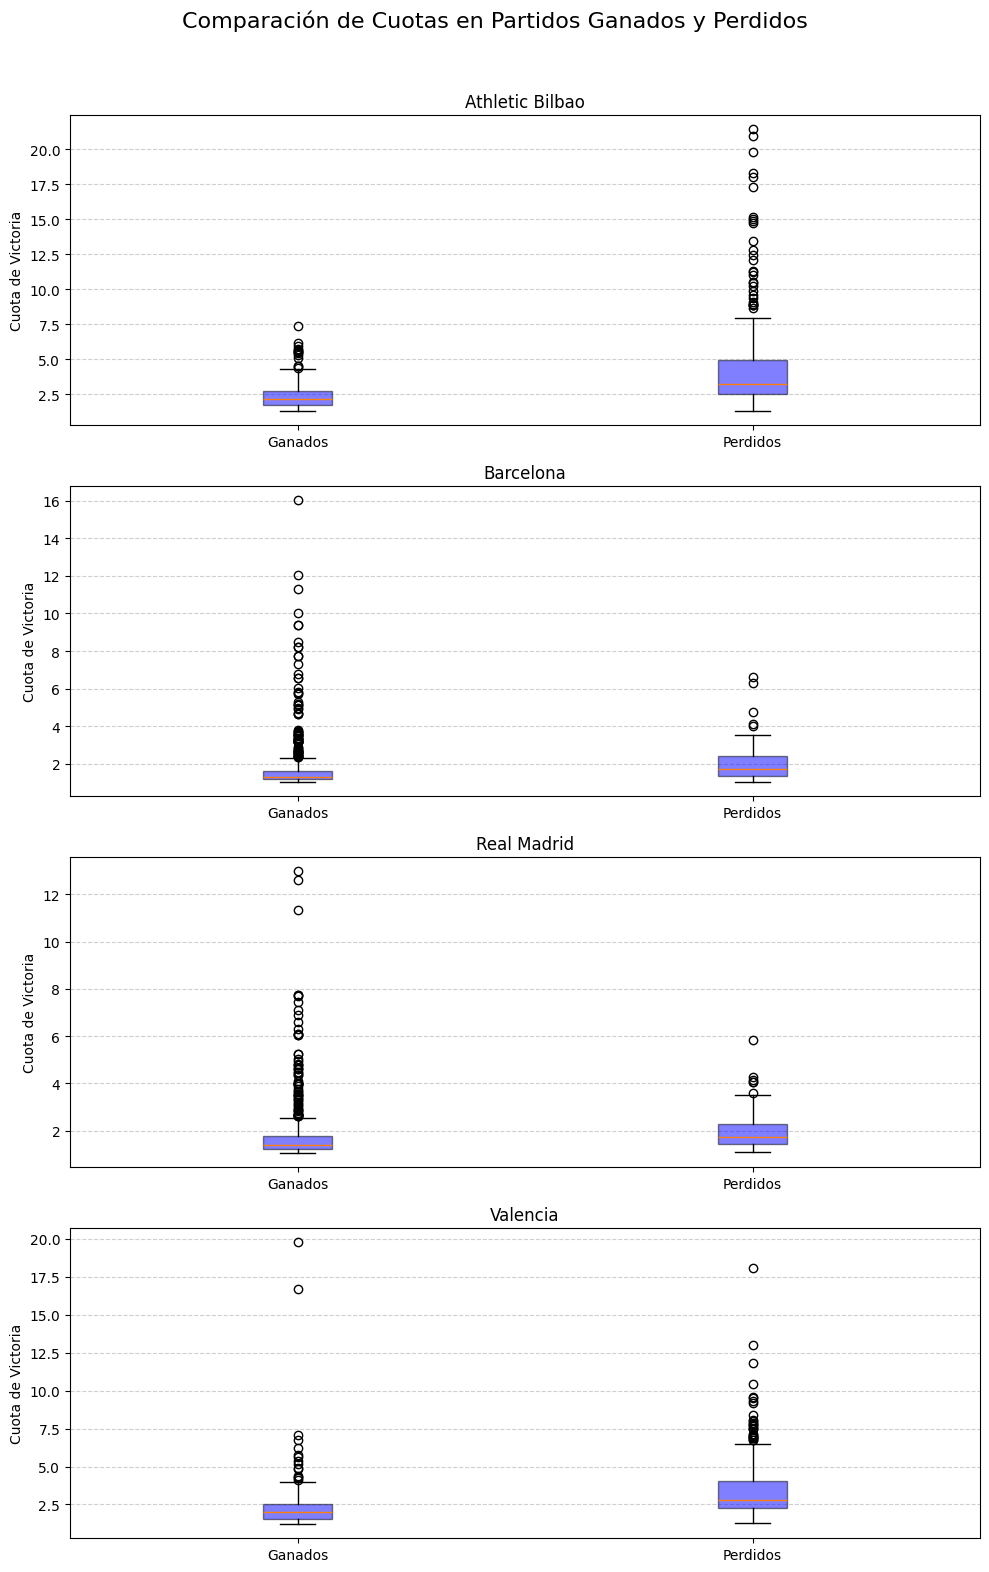

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 16))
fig.suptitle("Comparación de Cuotas en Partidos Ganados y Perdidos", fontsize=16)

for i, (team, path) in enumerate(file_paths.items()):
    df = pd.read_csv(path)

    # Separar cuotas en partidos ganados y perdidos
    win_odds = df[df["result"] == 1]["AvgWin"]
    loss_odds = df[df["result"] == -1]["AvgWin"]

    # Crear boxplot
    axes[i].boxplot([win_odds, loss_odds], labels=["Ganados", "Perdidos"], patch_artist=True,
                    boxprops=dict(facecolor="blue", alpha=0.5))
    
    axes[i].set_title(team)
    axes[i].set_ylabel("Cuota de Victoria")
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Relación entre las cuotas y el resultado del partido (Filtrando cuotas entre 0 y 5)

- Se analiza cómo las cuotas de victoria (`AvgWin`) están relacionadas con el resultado (`result`), considerando solo cuotas entre 0 y 5.
- Se calcula la correlación entre `AvgWin` y `result` para determinar si cuotas más altas están asociadas con más derrotas.
- Un coeficiente de correlación positivo indicaría que cuotas más altas llevan a más derrotas, mientras que un coeficiente negativo sugeriría lo contrario.
- Se descartan valores extremos de cuotas para centrarse en el rango más relevante.

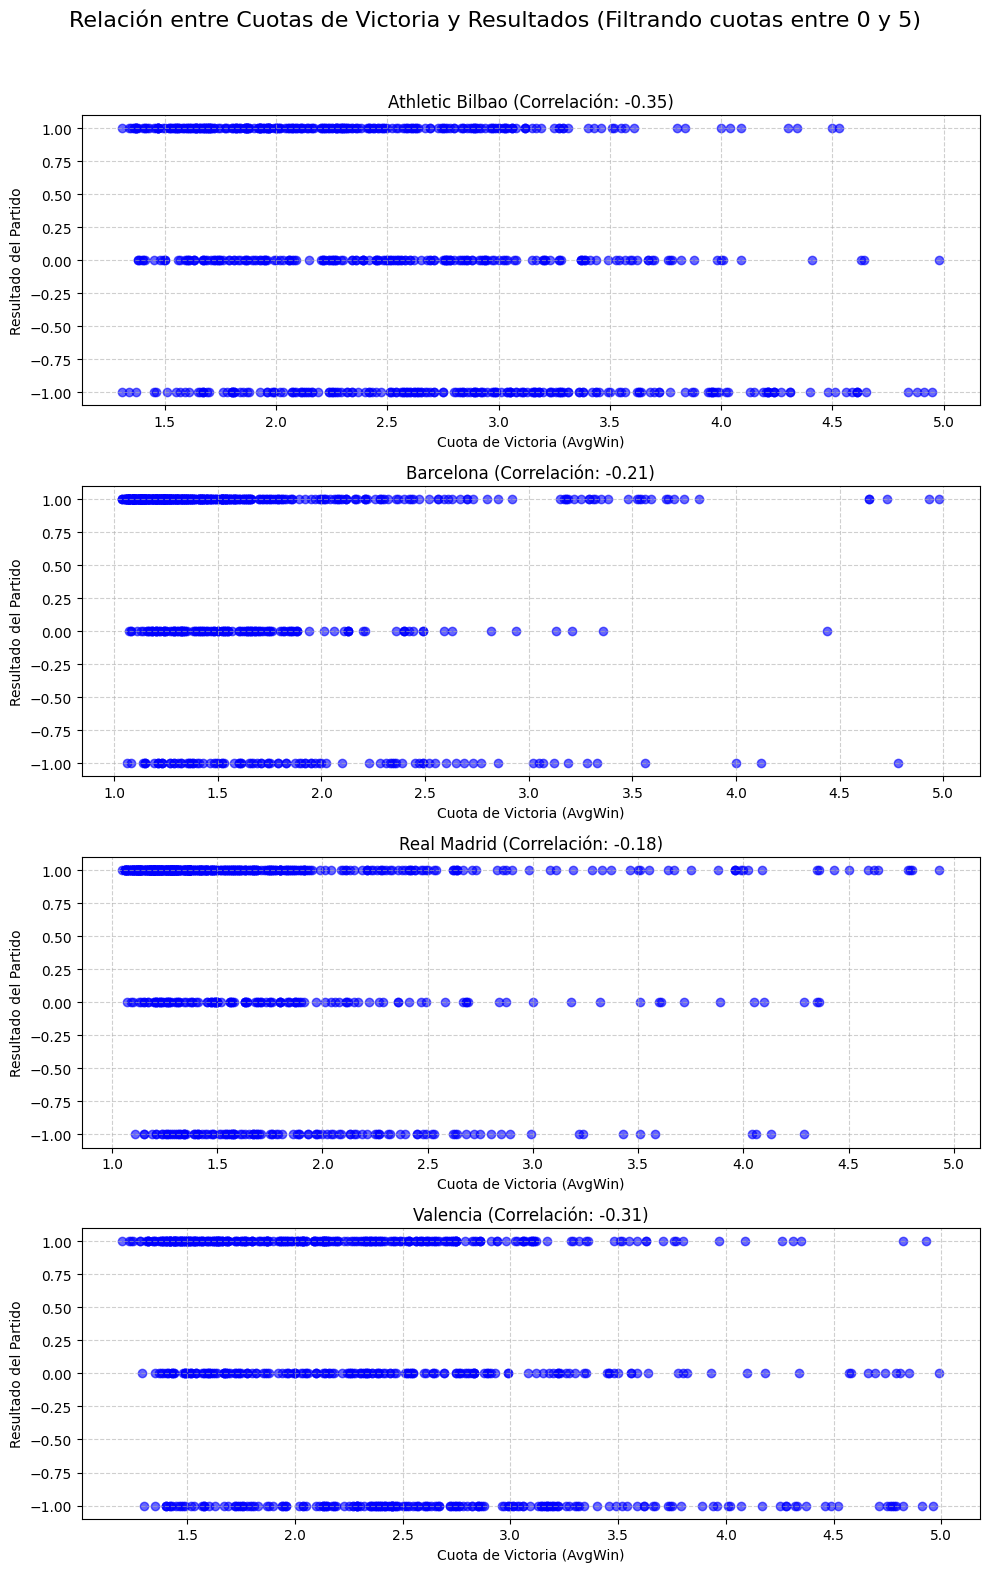

Coeficientes de correlación entre AvgWin y el resultado del partido (Filtrando cuotas entre 0 y 5):
Athletic Bilbao: -0.35
Barcelona: -0.21
Real Madrid: -0.18
Valencia: -0.31


In [13]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 16))
fig.suptitle("Relación entre Cuotas de Victoria y Resultados (Filtrando cuotas entre 0 y 5)", fontsize=16)

correlation_results = {}

for i, (team, path) in enumerate(file_paths.items()):
    df = pd.read_csv(path)

    # Filtrar cuotas entre 0 y 5
    df_filtered = df[(df["AvgWin"] > 0) & (df["AvgWin"] <= 5)]

    # Calcular correlación entre AvgWin y result
    correlation = df_filtered["AvgWin"].corr(df_filtered["result"])
    correlation_results[team] = correlation

    # Scatter plot de AvgWin vs result
    axes[i].scatter(df_filtered["AvgWin"], df_filtered["result"], alpha=0.6, color="blue")
    axes[i].set_title(f"{team} (Correlación: {correlation:.2f})")
    axes[i].set_xlabel("Cuota de Victoria (AvgWin)")
    axes[i].set_ylabel("Resultado del Partido")
    axes[i].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Mostrar los coeficientes de correlación
print("Coeficientes de correlación entre AvgWin y el resultado del partido (Filtrando cuotas entre 0 y 5):")
for team, corr in correlation_results.items():
    print(f"{team}: {corr:.2f}")

#### Evolución del rendimiento del equipo a lo largo del tiempo

- Se muestra la evolución del porcentaje de victorias (`pct_wins`) y la diferencia de goles (`goal_difference`) a lo largo de las temporadas.
- Se utilizan dos ejes en cada gráfico: 
  - Eje izquierdo para la diferencia de goles (`goal_difference`).
  - Eje derecho para el porcentaje de victorias (`pct_wins`), con un rango de 0 a 1.
- Permite analizar tendencias de mejora o declive en el rendimiento de cada equipo, diferenciando entre rendimiento ofensivo/defensivo y efectividad en victorias.


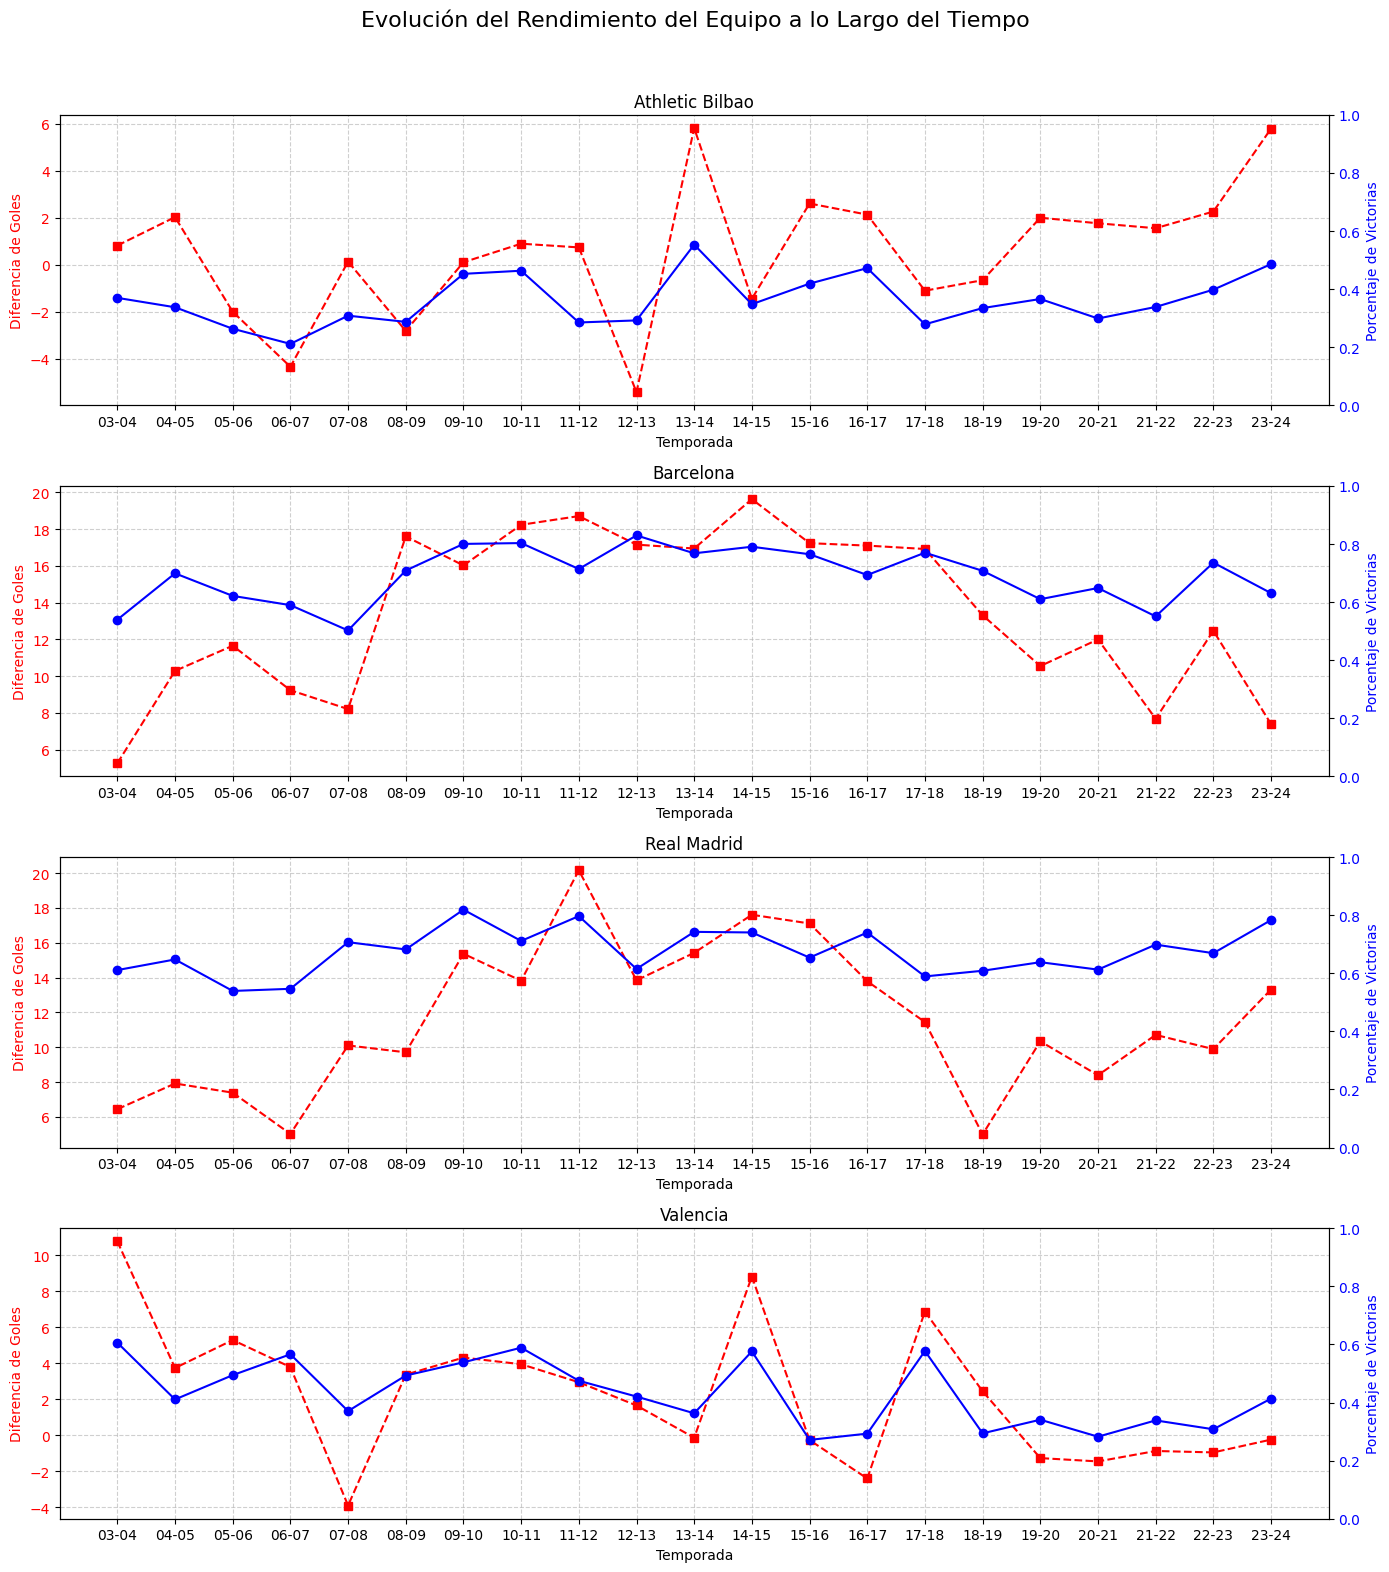

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 16))
fig.suptitle("Evolución del Rendimiento del Equipo a lo Largo del Tiempo", fontsize=16)

for i, (team, path) in enumerate(file_paths.items()):
    df = pd.read_csv(path)

    # Agrupar por temporada y calcular promedios
    df_grouped = df.groupby("season")[["pct_wins", "goal_difference"]].mean().reset_index()
    
    # Formatear la temporada como '03-04'
    df_grouped["season"] = df_grouped["season"].apply(lambda x: f"{x[2:4]}-{x[5:]}")

    # Crear un eje secundario para el porcentaje de victorias
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # Graficar goal_difference en el eje izquierdo
    ax1.plot(df_grouped["season"], df_grouped["goal_difference"], marker="s", linestyle="--", color="red", label="Diferencia de Goles")
    ax1.set_ylabel("Diferencia de Goles", color="red")
    ax1.tick_params(axis='y', labelcolor="red")
    ax1.grid(True, linestyle="--", alpha=0.6)

    # Graficar pct_wins en el eje derecho
    ax2.plot(df_grouped["season"], df_grouped["pct_wins"], marker="o", linestyle="-", color="blue", label="Porcentaje de Victorias")
    ax2.set_ylabel("Porcentaje de Victorias", color="blue")
    ax2.tick_params(axis='y', labelcolor="blue")
    ax2.set_ylim(0, 1)

    ax1.set_title(team)
    ax1.set_xlabel("Temporada")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
